# healtcare projct


generic_name:
The chemical name of the drug (not brand name)

drug_classes:
- The drug belongs to which drug class, i.e a drug class is a set of medications and other compounds that have a similar chemical structure, the same mechanism of action (i.e. binding to the same biological target), a related mode of action, and/or are used to treat the same disease.

brand_names:
- brand names in which the drugs are being sold or available in the market.

activity:
- Activity is based on recent site visitor activity relative to other medications in the list. Data was gathered from https://www.drugs.com

rx_otc: 
- Rx-to-OTC switch is the transfer of proven prescription drugs to nonprescription, where 
- OTC (Over-the-counter) = Medication that can be purchased without a medical prescription
- Rx = Prescription Needed
- Rx/OTC = Prescription or Over-the-counter.

pregnancy_category:
- A = Adequate and well-controlled studies have failed to demonstrate a risk to the fetus in the first trimester of pregnancy (and there is no evidence of risk in later trimesters).
- B = Animal reproduction studies have failed to demonstrate a risk to the fetus and there are no adequate and well-controlled studies in pregnant women.
- C = Animal reproduction studies have shown an adverse effect on the fetus and there are no adequate and well-controlled studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.
- D = There is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience or studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.
- X = Studies in animals or humans have demonstrated fetal abnormalities and/or there is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience, and the risks involved in use in pregnant women clearly outweigh potential benefits.
- N = FDA has not classified the drug.

csa:

Controlled Substances Act (CSA) Schedule
- M = The drug has multiple schedules. The schedule may depend on the exact dosage form or strength of the medication.
- U = CSA Schedule is unknown.
- N = Is not subject to the Controlled Substances Act.
 -1 = Has a high potential for abuse. Has no currently accepted medical use in treatment in the United States. There is a lack of accepted safety for use under medical supervision.
- 2 = Has a high potential for abuse. Has a currently accepted medical use in treatment in the United States or a currently accepted medical use with severe restrictions. Abuse may lead to severe psychological or physical dependence.
- 3 = Has a potential for abuse less than those in schedules 1 and 2. Has a currently accepted medical use in treatment in the United States. Abuse may lead to moderate or low physical dependence or high psychological dependence.
- 4 = Has a low potential for abuse relative to those in schedule 3. It has a currently accepted medical use in treatment in the United States. Abuse may lead to limited physical dependence or psychological dependence relative to those in schedule 3.
- 5 = Has a low potential for abuse relative to those in schedule 4. Has a currently accepted medical use in treatment in the United States. Abuse may lead to limited physical dependence or psychological dependence relative to those in schedule 4.

alcohol:
- X = Interacts with Alcohol.

rating:
- For ratings, users were asked how effective they found the medicine while considering positive/adverse effects and ease of use (1 = not effective, 10 = most effective).

All other columns are self-explanatory.

In [1]:
import pandas as pd
import numpy as np 
import zipfile
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

#----------------------NLP stuff------------------------
import string
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
nltk.download('wordnet')




import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=np.inf)

/Users/mikkelpedersen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikkelpedersen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mikkelpedersen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
with zipfile.ZipFile('/Users/mikkelpedersen/Desktop/project_vs_studio/ML projekter/healthcare.zip', 'r') as z:
    f = z.open('drugs_side_effects_drugs_com.csv')
    hc = pd.read_csv(f, index_col=0)
    
hc.head(10)

,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
drug_name,,,,,,,,,,,,,,,,
doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",CaroSpir,35%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6,8.0,https://www.drugs.com/aldactone.html,https://www.drugs.com/condition/acne.html
tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,"Altreno, Atralin, Avita, Refissa, Renova, Reti...",30%,Rx,C,N,NaN,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7,439.0,https://www.drugs.com/mtm/tretinoin-topical.html,https://www.drugs.com/condition/acne.html
isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...","Absorica, Accutane, Amnesteem, Claravis, Myori...",26%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0,999.0,https://www.drugs.com/mtm/isotretinoin.html,https://www.drugs.com/condition/acne.html
Bactrim,Acne,"skin rash, fever, swollen glands, joint pain, ...",sulfamethoxazole and trimethoprim,Sulfonamides,Bactrim DS,20%,Rx,D,N,X,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,8.5,96.0,https://www.drugs.com/bactrim.html,https://www.drugs.com/condition/acne.html


In [3]:
def info_func(df, col1):
    print(f'The amount of null values{df.isnull().count()}')
    print(df.any().duplicated())
    print(df.info())
    print('-'*40)
    print(df[col1].value_counts().sort_values(ascending=True))

In [4]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2931 entries, doxycycline to setmelanotide
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   medical_condition              2931 non-null   object 
 1   side_effects                   2807 non-null   object 
 2   generic_name                   2888 non-null   object 
 3   drug_classes                   2849 non-null   object 
 4   brand_names                    1718 non-null   object 
 5   activity                       2931 non-null   object 
 6   rx_otc                         2930 non-null   object 
 7   pregnancy_category             2702 non-null   object 
 8   csa                            2931 non-null   object 
 9   alcohol                        1377 non-null   object 
 10  related_drugs                  1462 non-null   object 
 11  medical_condition_description  2931 non-null   object 
 12  rating                         158

In [5]:
hc.isna().sum()

medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [6]:
condtion_count = hc['medical_condition'].value_counts()

hc['condition_count'] = hc['medical_condition'].map(condtion_count)
hc['medical_condition'] = hc['medical_condition'].where(hc['condition_count'] > 19, 'other')
hc = hc.drop(columns='condition_count')


hc['medical_condition'].value_counts()

medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
other                   117
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Cholesterol              45
Anxiety                  45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD                     23
IBD (Bowel)              22
Sc

In [7]:
columns_to_drop = ['medical_condition_url', 'no_of_reviews','drug_link', 'related_drugs', 'activity' ]
hc = hc.drop(columns=columns_to_drop, axis=1)

In [8]:
hc.head(10)

,medical_condition,side_effects,generic_name,drug_classes,brand_names,rx_otc,pregnancy_category,csa,alcohol,medical_condition_description,rating
drug_name,,,,,,,,,,,
doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",Rx,D,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8
spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",Rx,C,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2
minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",Rx,D,N,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7
Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,Rx,X,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9
clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",Rx,B,N,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4
Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",CaroSpir,Rx,C,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6
tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,"Altreno, Atralin, Avita, Refissa, Renova, Reti...",Rx,C,N,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7
isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...","Absorica, Accutane, Amnesteem, Claravis, Myori...",Rx,X,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0
Bactrim,Acne,"skin rash, fever, swollen glands, joint pain, ...",sulfamethoxazole and trimethoprim,Sulfonamides,Bactrim DS,Rx,D,N,X,Acne Other names: Acne Vulgaris; Blackheads; B...,8.5


In [9]:
hc['side_effects'][1]

'hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Call your doctor at once if you have: a light-headed feeling, like you might pass out; little or no urination; high potassium level - nausea , weakness, tingly feeling, chest pain, irregular heartbeats, loss of movement; o signs of other electrolyte imbalances - increased thirst or urination, confusion, vomiting , muscle pain, slurred speech, severe weakness, numbness , loss of coordination, feeling unsteady. Common spironolactone side effects may include: breast swelling or tenderness.'

In [10]:
def caount_labels(data, col1):
    print('The amount of missing values in the dataframe:')
    print(data.isnull().sum())
    print('-'*40)
    print('The target distribution')
    print(data[col1].value_counts())
    print('-'*40)
    print('Some basic info of the DataFrame')
    print(data.info())
    print('-'*40)
    #value_count_target = data[col1].value_counts()

    ax = sns.countplot(x=data[col1], hue=data[col1], palette='rocket')
    ax.set_xlabel(f"Name of Class")
    ax.set_ylabel("The Number Of Samples for each class")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    #for i, count in enumerate(value_count_target.values):
    #    ax.text(i, count + 5, str(count), ha='center', va='top')


    plt.show()

The amount of missing values in the dataframe:
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
medical_condition_description       0
rating                           1345
dtype: int64
----------------------------------------
The target distribution
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
other                   117
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine           

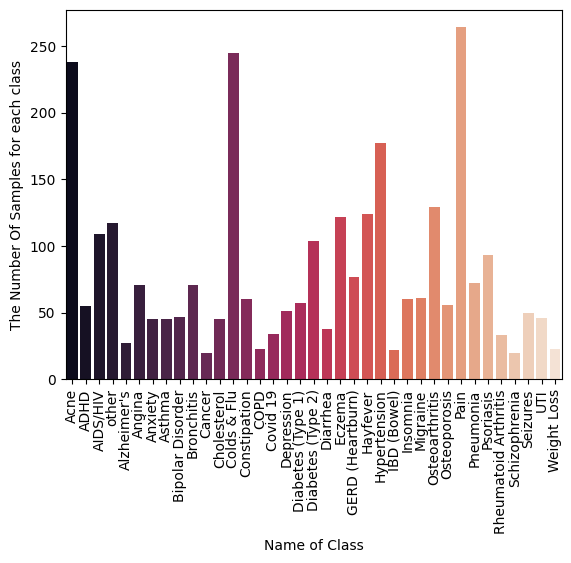

In [11]:
caount_labels(hc, 'medical_condition')

it can be concluded from the figure that the data is pretty imbalanced, however mostly three medical conditions screws the data. Otherwise it could have been fairly balanced

In [12]:
stemmer = PorterStemmer()#WordNetLemmatizer() 
stop = stopwords.words('english')
tt = TweetTokenizer()


def pre_process(text):
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    words = [word for word in text.split() if word not in stop]
    text = ' '.join([stemmer.stem(word) for word in words])

    text = tt.tokenize(text)
    return text

In [13]:
pre_process("""The Teacher is a remarkable woman wh88o 0 has dedicated her life to the field of Natural Language Processing (NLP). 
                With her radiant smile and infectious enthusiasm, she has the ability to make complex concepts seem simple. 
                """)

['teacher',
 'remark',
 'woman',
 'dedic',
 'life',
 'field',
 'natur',
 'languag',
 'process',
 'nlp',
 'radiant',
 'smile',
 'infecti',
 'enthusiasm',
 'abil',
 'make',
 'complex',
 'concept',
 'seem',
 'simpl']

In [14]:
def to_string(df, col):
    df[col] = df[col].astype(str)
    
to_string(hc, 'side_effects')   
to_string(hc, 'drug_classes')
to_string(hc, 'brand_names')
to_string(hc, 'medical_condition_description')

In [15]:
hc['side_effects'] = hc['side_effects'].apply(pre_process)
hc['drug_classes'] = hc['drug_classes'].apply(pre_process)
hc['brand_names'] = hc['brand_names'].apply(pre_process)
hc['medical_condition_description'] = hc['medical_condition_description'].apply(pre_process)
